In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('../resources/Excel_sheets/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


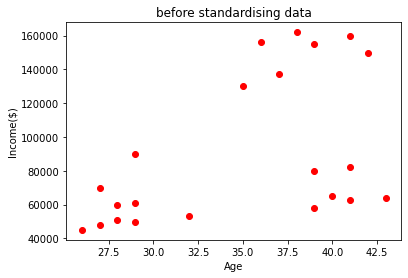

In [3]:
plt.scatter(df.Age,df['Income($)'],color='r')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('before standardising data')
plt.show()

In [4]:
df1=df.copy()
scaler=MinMaxScaler() 
scaler.fit(df[['Income($)']])   #df['Income($)'] gives series; df[['Income($)']] gives DataFrame
df1['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df1['Age']=scaler.transform(df[['Age']])

df1.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


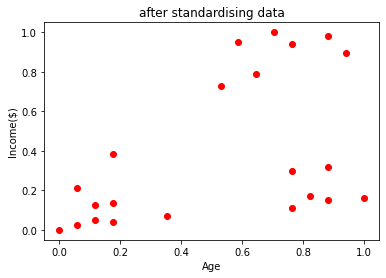

In [5]:
plt.scatter(df1.Age,df1['Income($)'],color='r')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('after standardising data')
plt.show()

In [8]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
y_predicted=km.fit_predict(df1[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [13]:
df1['cluster']=y_predicted
df1.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [24]:
centroids=km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

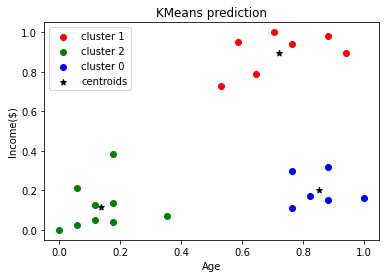

In [31]:
plt.scatter(df1[df1['cluster']==1].Age,df1[df1['cluster']==1]['Income($)'],color='r',label='cluster 1')
plt.scatter(df1[df1['cluster']==2].Age,df1[df1['cluster']==2]['Income($)'],color='g',label='cluster 2')
plt.scatter(df1[df1['cluster']==0].Age,df1[df1['cluster']==0]['Income($)'],color='b',label='cluster 0')
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='black',label='centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('KMeans prediction')
plt.legend()
plt.show()

In [38]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df1[['Age','Income($)']])
    sse.append(km.inertia_)  # km.inertia_  gives sum of square error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


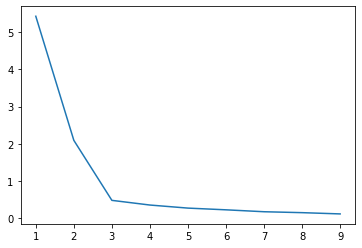

In [40]:
plt.plot(range(1,10),sse)

elbow is at 3 therefore best K value=3